# Project:The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description


This data set contains information about 10,866 movies collected from The Movie Database(TMDb), and these are the columns in the dataset id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj. 

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### Question to be deduced from the dataset

Questions

i Which year experienced the most movie release? 
ii Which Genre were mostly released?
iii Does the length of movies affect its popuarity?

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline
#Importing the functions I will need for my analysis 

In [287]:
df = pd.read_csv('tmdb-movies.csv')
df.head()
#Reading my CSV file downloaded into my notebook

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [288]:
df.tail
##Output shows that I have 10866 rows and 21 columns 

<bound method NDFrame.tail of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [289]:
df.dtypes
#This helps me view if the data type for each column is appropriate

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [290]:
df.info()
#This allows me to see the number of null values associated with each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning (Expunging unneeded data)

Steps to be taken includes:
i. Removing irrelevant columns that is not necessary to the analysis process
ii. replacing the null in the data set
iii. Changing format of release date into datetime format

In [291]:
df.drop(['homepage','cast','overview','imdb_id','homepage','revenue','tagline','production_companies'], axis = 1, inplace=True)

In [292]:
df.shape
#I now have 10866 rows and 14 columns

(10866, 14)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   keywords        9373 non-null   object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [294]:
df.isnull().sum()
#This allows me to see the sum of nulls associated with each columns 

id                   0
popularity           0
budget               0
original_title       0
director            44
keywords          1493
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [295]:
df.fillna(0)
print()
#The columns with null values have been replaced with 0

In [296]:
sum(df.duplicated())
#This function allows me to know the total number of duplicate within the data set

1

In [297]:
df.drop_duplicates(inplace=True)
#I have dropped the duplicate found in my data set

In [298]:
df.shape
#This is to confirm the changes done to my data set after removing duplicate and replacing null

(10865, 14)

In [299]:
#Our new data set shape shows that one row has been removed as we now have 10865 row

In [300]:
df['release_date']= pd.to_datetime(df['release_date'])
df['release_date'].head()
#I changed the release date formate to a timestamp format as the release date datatype is in a string format

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [301]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget_adj']==0)].shape[0])
#This is to show me the number of rows with zero values in the budget column

Rows With Zero Values In The Budget Column: 5696


In [302]:
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue_adj']==0)].shape[0])
#This is to show me the number of rows with zero values in the revenue column

Rows With Zero Values In The Revenue Column: 6016


In [303]:
df.describe()
#To get the statistics for the numerical columns
#From the statistics, we can see that the data covers movies released from 1960 - 2015

,id,popularity,budget,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Exploratory Data Analysis

## Research Questions: 
i Which year experienced the most movie release? 
ii Which Genre were mostly released?
iii Does the length of movies affect its popuarity?

##Research Question 1  : Which year experienced the most movie release?

In [311]:
#To get the year with the most movie release
# we would be grouping the year and count the number of movies in each year
data= df.groupby('release_year').count()['id']

In [305]:
print (data.tail())

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


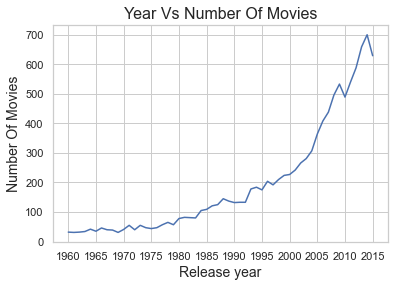

In [306]:
# We would do another grouping here using the year and total count of movies in each year for our graph.

df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

# Setting the figure size and labels.

sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 16)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)

#set the style sheet

sns.set_style("darkgrid")


> Based on the outcome of the graph and our analysis we can say 2014 has the highest release of movies (700), 2013 with (659) and 2015 with (629)

### Research Question 2  : Which Genre were mostly released?

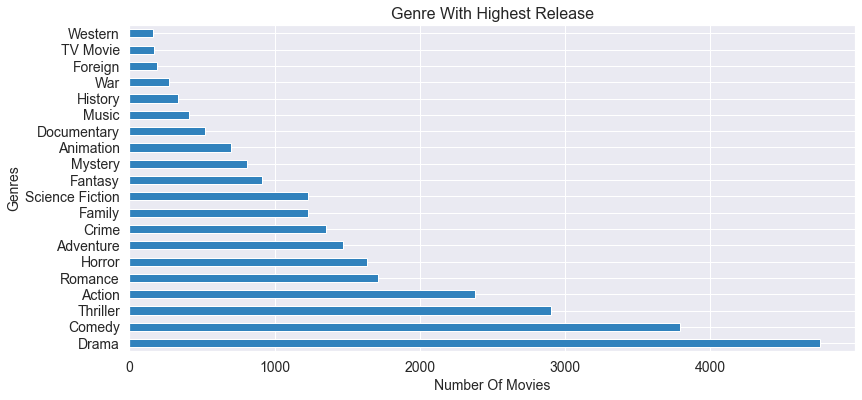

In [308]:
#  To get the the count of the genre a function is made to split the string and return the count of each genre.
def count_genre(x):
    # concatenate all the rows of the genre.
    
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    
    # counts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

# call the function for counting the movies of each genre.

total_genre_movies = count_genre('genres')

#plot a 'barh' plot using plot function for 'genre vs number of movies'.

total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=14,colormap='tab20c')

# Titles and labels of the plot 
plt.title("Genre With Highest Release",fontsize=16)
plt.xlabel('Number Of Movies',fontsize=14)
plt.ylabel("Genres",fontsize= 14)
sns.set_style("whitegrid")


> Based on the result from our graph we can see that Drama genre has the highes release of movies followed by Comedy and Thriller.



### Research Question 3 :Does the length of movies affect its popuarity?

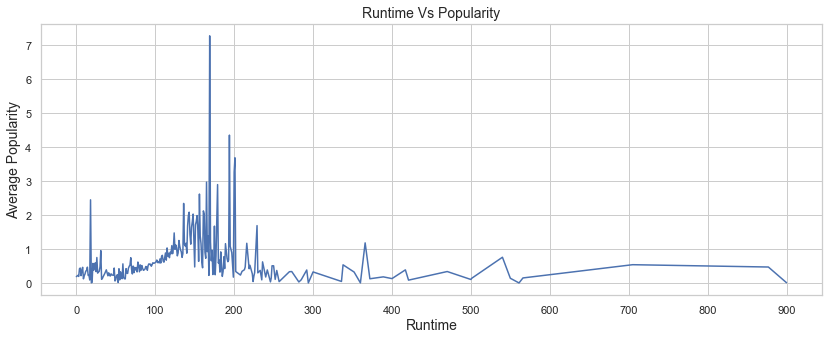

In [309]:
# For this we would do a groupby to group the data according to their runtime.

# Using their popularity the most popular length movies was found.

# make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (14,5),xticks=np.arange(0,1000,100))

# We will be setting the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

# We will be setting up  the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 14)
plt.ylabel('Average Popularity',fontsize = 14)

# We will be setting up the figure size.

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> Based on the graph analysis the movies that range from 100 to 200 runtime are more popular than movies with longer runtime because long duration movies gets tiring and boring.

<a id='conclusions'></a>
## Conclusions

>

i. Top 3 popular Genres include action,comedy and thriller.
ii. The year 2014 experiened the highest number of movie release
iii. Movies that have runtimes ranging from 100-200 runtime are more popular than movies with runtimes greater than 200.

>**Limitations**
- While cleaning the dataset some columns were removed from the dataframe because they were not important to the exploatory process.